# Reading the pomodoros ods and plot

2024-05-27 00:00:00 2024-06-14 00:00:00
            calipso   bht
2024-05-27      0.0   8.0
2024-05-28      0.0  10.0
2024-05-29      0.0   5.0
2024-05-30      0.0   0.0
2024-05-31      0.0   0.0
2024-06-01      0.0   0.0
2024-06-02      0.0   0.0
2024-06-03      0.0   0.0
2024-06-04      0.0   0.0
2024-06-05      0.0   0.0
2024-06-06      0.0   0.0
2024-06-07      0.0   0.0
2024-06-08      0.0   0.0
2024-06-09      0.0   0.0
2024-06-10      0.0   0.0
2024-06-11      0.0   0.0
2024-06-12      0.0   0.0
2024-06-13      0.0   0.0
2024-06-14      0.0   0.0


<BarContainer object of 19 artists>

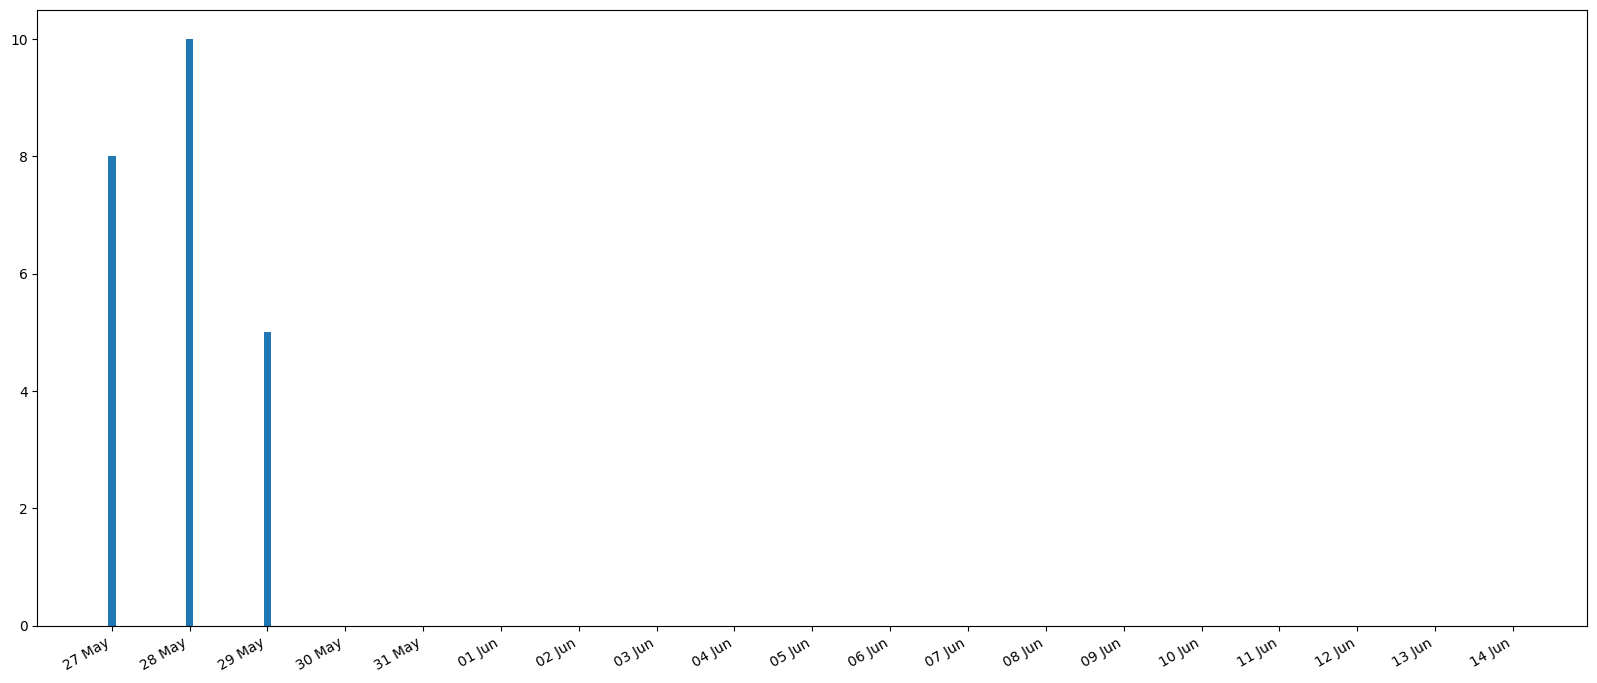

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

    
my_df = pd.read_excel("pomodoros.ods", sheet_name="pomodoros",header=1, index_col=0, parse_dates=True)
my_df.fillna(0, inplace=True)

day_first = my_df.index[0]
day_last = my_df.index[-1]
print(day_first, day_last)


fig, ax = plt.subplots(1, figsize=(20,8), sharex=True)


day_idx = pd.date_range(start=day_first, end=day_last, freq='D')

my_df=my_df.reindex(day_idx, fill_value=0.0)
# print(my_df)


ax.tick_params(axis='x', labelsize=10, rotation=30)
# date_format = '%a %d %b'
# date_format = '%d-%m-%y'
date_format = '%d %b'
ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax.set_xticks(day_idx)
ax.set_xticklabels (ax.get_xticklabels(), ha="right")

ax.bar(my_df.index, my_df.bht, width=0.1)
